Name: Dheeraj Kumar Ambedkar  \n
School: CDS  \n

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from google.colab import drive

2.17.1


In [ ]:
import os
import glob
import PIL
from PIL import Image

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the saved data from Google Drive
X_train_std = np.load("/content/drive/MyDrive/Processed_data/X_train_std.npy")
y_train = np.load("/content/drive/MyDrive/Processed_data/y_train.npy")
X_test_std = np.load("/content/drive/MyDrive/Processed_data/X_test_std.npy")
y_test = np.load("/content/drive/MyDrive/Processed_data/y_test.npy")
y = np.load("/content/drive/MyDrive/Processed_data/y.npy")

In [ ]:
from keras.utils import custom_object_scope

# Define your custom layer
class CustomScaleLayer(tf.keras.layers.Layer):
    def __init__(self, scale, **kwargs):
        super(CustomScaleLayer, self).__init__(**kwargs)
        self.scale = float(scale)  # Ensure scale is a float

    def call(self, inputs):
        if isinstance(inputs, list):  # Handle multiple inputs
            inputs = inputs[0]  # Use the first input tensor
        return inputs * self.scale

    def compute_output_shape(self, input_shape):
        return input_shape

# Load the model with the custom layer
with custom_object_scope({'CustomScaleLayer': CustomScaleLayer}):
    model3_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/InceptionResNetV2_TransferLearning_Best_Model.h5')


In [ ]:
model3_FineTune.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_203 (Conv2D)       │ (None, None, None, 32) │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, None, None, 32) │             96 │ conv2d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, None, None, 32) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_204 (Conv2D)       │ (None, None, None, 32) │          9,216 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, None, None, 32) │             96 │ conv2d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, None, None, 32) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_205 (Conv2D)       │ (None, None, None, 64) │         18,432 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, None, None, 64) │            192 │ conv2d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, None, None, 64) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, None, None, 64) │              0 │ activation_205[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_206 (Conv2D)       │ (None, None, None, 80) │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_206   │ (None, None, None, 80) │            240 │ conv2d_206[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_206            │ (None, None, None, 80) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)  

 Total params: 54,344,423 (207.31 MB)

 Trainable params: 54,283,877 (207.08 MB)

 Non-trainable params: 60,544 (236.50 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
x = 0
for layer in model3_FineTune.layers[:]:
  x = x+1
print(x)

783


In [ ]:


for layer in model3_FineTune.layers:
    layer.trainable = True

In [ ]:
model3_FineTune.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT_3.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model3_FineTune.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', 'kernel', 'bias', 'kernel', 'beta', 'kernel', 'kernel', 'beta', 'beta', 'kernel', 'kernel', 'kernel', 'beta', 'beta', 'beta', '

28/28 ━━━━━━━━━━━━━━━━━━━━ 500s 16s/step - accuracy: 0.4343 - loss: 1.5337 - val_accuracy: 0.0800 - val_loss: 2.0832
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 491s 16s/step - accuracy: 0.4337 - loss: 1.3456 - val_accuracy: 0.0800 - val_loss: 1.6917
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 447s 16s/step - accuracy: 0.4297 - loss: 1.1438 - val_accuracy: 0.5200 - val_loss: 1.4534
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 493s 16s/step - accuracy: 0.4215 - loss: 1.0470 - val_accuracy: 0.5200 - val_loss: 1.3277
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 444s 16s/step - accuracy: 0.4510 - loss: 1.0119 - val_accuracy: 0.5200 - val_loss: 1.2563
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 493s 16s/step - accuracy: 0.4268 - loss: 0.9971 - val_accuracy: 0.5200 - val_loss: 1.1980
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 445s 16s/step - accuracy: 0.4494 - loss: 0.9854 - val_accuracy: 0.5200 - val_loss: 1.1505
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 440s 16s/step - accuracy: 0.4630 - loss: 0.9777 - val_accuracy: 0.5200 - val_

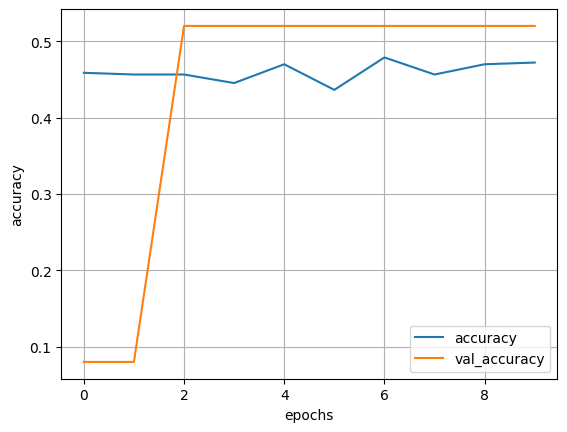

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model3_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4220 - loss: 1.0791
Test-loss: 1.066598, Test-accuracy: 0.451807


In [ ]:
model3_FineTune.load_weights("bestFT_3.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model3_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4220 - loss: 1.6009
Test-loss: 1.545428, Test-accuracy: 0.451807


In [ ]:
Proba = model3_FineTune.predict(X_test_std[:1])

print(Proba)

cLabel = np.argmax(Proba, axis=-1)

print(cLabel)

print(y_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0.0847595  0.47172165 0.38933128 0.02152716 0.03266043]]
[1]
[0]


In [ ]:
y_proba = model3_FineTune.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[ 0, 75,  0],
       [ 0, 75,  0],
       [ 0, 16,  0]])

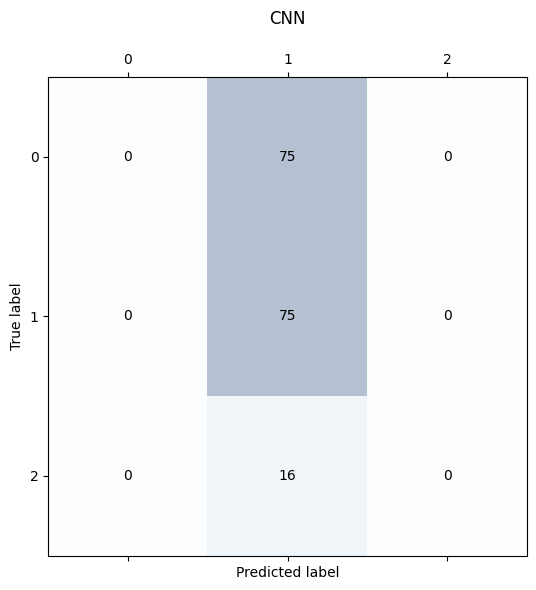

{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']


In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.20412977210044997
Recall:  0.45180722891566266
F1-score:  0.2812078188271759






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Saves the best model obtained
model3_FineTune.save('/content/drive/MyDrive/Models/InceptionResNetV2_FineTuning  `_Best_Model.h5')